In [109]:
import pandas as pd
import numpy as np
# Load the Excel file
file_path = "Media data-Sale Calendar-NPS Scores_Data (1).xlsx"
xls = pd.ExcelFile(file_path)

# Display sheet names
xls.sheet_names

['Media Investment', 'Special Sale Calendar', 'Monthly NPS Score']

In [110]:

media_df = pd.read_excel(xls, sheet_name="Media Investment")


media_df.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,"Investment in various media heads, INR Cr.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other
2,NaN,2023,7,17.06,0.22,2.53,7.41,0.00,1.33,0.55,5.02,NaN,NaN
3,NaN,2023,8,5.06,0.01,1.28,1.06,0.00,0.13,0.07,2.51,NaN,NaN
4,NaN,2023,9,96.25,3.88,1.36,62.79,0.61,16.38,5.04,6.20,NaN,NaN


In [111]:
# Remove unnecessary rows and rename columns properly
media_df_cleaned = media_df.iloc[2:].reset_index(drop=True)

# Rename columns
media_df_cleaned.columns = [
    "Drop1", "Year", "Month", "Total Investment", "TV", "Digital", "Sponsorship",
    "Content Marketing", "Online Marketing", "Affiliates", "SEM", "Radio", "Other"
]

# Drop unnecessary first column
media_df_cleaned = media_df_cleaned.drop(columns=["Drop1"])

# Convert all relevant columns to numeric
cols_to_convert = [
    "Total Investment", "TV", "Digital", "Sponsorship", "Content Marketing",
    "Online Marketing", "Affiliates", "SEM", "Radio", "Other"
]

media_df_cleaned[cols_to_convert] = media_df_cleaned[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Multiply by 1 crore (10^7)
media_df_cleaned[cols_to_convert] *= 10**7

# Fill missing values in "Radio" and "Other" with 1
media_df_cleaned["Radio"].fillna(1, inplace=True)
media_df_cleaned["Other"].fillna(1, inplace=True)

# Display the cleaned DataFrame
media_df_cleaned.head()


/var/folders/cj/3ljy47hs5kd1pn27_v3wcff40000gn/T/ipykernel_76533/2173369586.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  media_df_cleaned["Radio"].fillna(1, inplace=True)
/var/folders/cj/3ljy47hs5kd1pn27_v3wcff40000gn/T/ipykernel_76533/2173369586.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online Marketing,Affiliates,SEM,Radio,Other
0,2023,7,170617754.43,2153302.04,25330137.08,74142697.34,9328.98,13272775.95,5472538.59,50236974.45,1.00,1.00
1,2023,8,50643060.89,64380.73,12780736.84,10633317.58,63.25,1292442.64,736839.80,25135280.04,1.00,1.00
2,2023,9,962543798.65,38795036.17,13565275.98,627876513.14,6102920.82,163799899.93,50382662.16,62021490.45,1.00,1.00
3,2023,10,1701562973.68,61447110.95,126224797.66,846725315.26,34440747.57,243717777.37,69737111.08,319270113.79,1.00,1.00
4,2023,11,512162204.16,42206297.40,12754689.92,141721159.18,1686331.89,195615743.50,65957665.56,52220316.71,1.00,1.00


In [112]:
# Create the GMV DataFrame
gmv_list = [
    174206832, 416096, 421760671, 502727831, 331386937,
    435820199, 387192999, 331567025, 404003023, 339703548,
    409453151, 305913306
]
gmv_df = pd.DataFrame({'GMV': gmv_list})

# Reset index of both DataFrames to ensure proper alignment
gmv_df.reset_index(drop=True, inplace=True)
media_df_cleaned.reset_index(drop=True, inplace=True)

# Concatenate the two DataFrames along columns
final_df = pd.concat([gmv_df, media_df_cleaned], axis=1)

# Display the updated DataFrame
final_df


,GMV,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online Marketing,Affiliates,SEM,Radio,Other
0,174206832,2023,7,170617754.43,2153302.04,25330137.08,74142697.34,9328.98,13272775.95,5472538.59,50236974.45,1.00,1.00
1,416096,2023,8,50643060.89,64380.73,12780736.84,10633317.58,63.25,1292442.64,736839.80,25135280.04,1.00,1.00
2,421760671,2023,9,962543798.65,38795036.17,13565275.98,627876513.14,6102920.82,163799899.93,50382662.16,62021490.45,1.00,1.00
3,502727831,2023,10,1701562973.68,61447110.95,126224797.66,846725315.26,34440747.57,243717777.37,69737111.08,319270113.79,1.00,1.00
4,331386937,2023,11,512162204.16,42206297.40,12754689.92,141721159.18,1686331.89,195615743.50,65957665.56,52220316.71,1.00,1.00
5,435820199,2023,12,1067453117.16,53975022.24,30633600.27,567054186.70,10673068.66,225037555.61,68269379.37,111810304.31,1.00,1.00
6,387192999,2024,1,741960000.00,43800000.00,4560000.00,42000000.00,9000000.00,229000000.00,73700000.00,42000000.00,27000000.00,270900000.00
7,331567025,2024,2,480520000.00,25860076.17,19126510.18,117255553.07,5967709.89,198923662.86,64650190.43,48736297.40,1.00,1.00
8,404003023,2024,3,1000246214.29,93000000.00,21000000.00,415900000.00,3700000.00,184378182.80,62176666.67,51935913.98,8700000.00,159455450.85
9,339703548,2024,4,568482413.79,52051962.55,8718921.70,243083537.01,348756.87,165145095.93,56934558.70,42199581.03,1.00,1.00


In [113]:
# Convert the scientific notation to full float values
pd.options.display.float_format = '{:.2f}'.format

# Display the DataFrame to see the updated values
final_df


,GMV,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online Marketing,Affiliates,SEM,Radio,Other
0,174206832,2023,7,170617754.43,2153302.04,25330137.08,74142697.34,9328.98,13272775.95,5472538.59,50236974.45,1.00,1.00
1,416096,2023,8,50643060.89,64380.73,12780736.84,10633317.58,63.25,1292442.64,736839.80,25135280.04,1.00,1.00
2,421760671,2023,9,962543798.65,38795036.17,13565275.98,627876513.14,6102920.82,163799899.93,50382662.16,62021490.45,1.00,1.00
3,502727831,2023,10,1701562973.68,61447110.95,126224797.66,846725315.26,34440747.57,243717777.37,69737111.08,319270113.79,1.00,1.00
4,331386937,2023,11,512162204.16,42206297.40,12754689.92,141721159.18,1686331.89,195615743.50,65957665.56,52220316.71,1.00,1.00
5,435820199,2023,12,1067453117.16,53975022.24,30633600.27,567054186.70,10673068.66,225037555.61,68269379.37,111810304.31,1.00,1.00
6,387192999,2024,1,741960000.00,43800000.00,4560000.00,42000000.00,9000000.00,229000000.00,73700000.00,42000000.00,27000000.00,270900000.00
7,331567025,2024,2,480520000.00,25860076.17,19126510.18,117255553.07,5967709.89,198923662.86,64650190.43,48736297.40,1.00,1.00
8,404003023,2024,3,1000246214.29,93000000.00,21000000.00,415900000.00,3700000.00,184378182.80,62176666.67,51935913.98,8700000.00,159455450.85
9,339703548,2024,4,568482413.79,52051962.55,8718921.70,243083537.01,348756.87,165145095.93,56934558.70,42199581.03,1.00,1.00


In [115]:
temp=final_df.copy()
temp1=final_df.copy()

In [123]:
temp1 = temp1.drop(columns=[ 'Total Investment'])  # ✅ flat list # Replace 'TV' with the column you want to remove

# Compute and display correlation matrix
correlation_matrix = temp1.corr()

# Display the matrix
print(correlation_matrix)

                    TV  Digital  Sponsorship  Content Marketing  \
TV                1.00     0.31         0.55               0.38   
Digital           0.31     1.00         0.69               0.90   
Sponsorship       0.55     0.69         1.00               0.73   
Content Marketing 0.38     0.90         0.73               1.00   
Online Marketing  0.63     0.26         0.50               0.57   
Affiliates        0.67     0.18         0.42               0.48   
SEM               0.35     0.97         0.77               0.96   
Radio             0.17    -0.26        -0.25               0.06   
Other             0.38    -0.22        -0.21               0.02   

                   Online Marketing  Affiliates   SEM  Radio  Other  
TV                             0.63        0.67  0.35   0.17   0.38  
Digital                        0.26        0.18  0.97  -0.26  -0.22  
Sponsorship                    0.50        0.42  0.77  -0.25  -0.21  
Content Marketing              0.57        0.48  

In [67]:
print(temp[['TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online Marketing','Affiliates','SEM','Radio','Other']])

            TV      Digital  Sponsorship  Content Marketing  Online Marketing  \
0   2153302.04  25330137.08  74142697.34            9328.98       13272775.95   
1     64380.73  12780736.84  10633317.58              63.25        1292442.64   
2  38795036.17  13565275.98 627876513.14         6102920.82      163799899.93   
3  61447110.95 126224797.66 846725315.26        34440747.57      243717777.37   
4  42206297.40  12754689.92 141721159.18         1686331.89      195615743.50   
5  53975022.24  30633600.27 567054186.70        10673068.66      225037555.61   
6  43800000.00   4560000.00  42000000.00         9000000.00      229000000.00   
7  25860076.17  19126510.18 117255553.07         5967709.89      198923662.86   
8  93000000.00  21000000.00 415900000.00         3700000.00      184378182.80   
9  52051962.55   8718921.70 243083537.01          348756.87      165145095.93   
10 13700000.00   7700000.00 316800000.00         7900000.00      236500000.00   
11 16627168.83  14207605.07 

In [70]:
selected_columns = ['TV', 'Digital', 'Sponsorship', 'Content Marketing', 
                    'Online Marketing', 'Affiliates', 'SEM', 'Radio', 'Other']

# Compute the sum of each column
column_sums = temp[selected_columns].sum()
print(column_sums.sum())


8463280931.99112


In [7]:
X = np.log(temp[['TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online Marketing','Affiliates','SEM','Radio','Other']])
y = temp['GMV']


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'temp' is your DataFrame
# Log-transform selected features
X = np.log(temp[['TV', 'Digital', 'Sponsorship', 'Content Marketing', 'Online Marketing',
                 'Affiliates', 'SEM', 'Radio', 'Other']])

# Target variable
y = temp['GMV']

# Split into training (80%) and testing (20%) sets (Random split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Initialize Ridge Regression model with regularization strength
alpha = 1.0  # You can tune this
ridge_reg = Ridge(alpha=alpha)

# Train the model
ridge_reg.fit(X_train, y_train)

# Predict on test data
y_pred = ridge_reg.predict(X_test)

# Print Model Coefficients
print(f"Intercept: {ridge_reg.intercept_}")  # Intercept
print(f"Coefficients: {ridge_reg.coef_}")  # Coefficients for each feature

# Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")




Intercept: -852632469.9133346
Coefficients: [ 8492177.50410255  3096118.08981958 17514790.60706889 24340803.7769322
  4686127.10183997  2585758.29266304 11026397.14051456  1987020.5858933
 -1304833.79743653]
Mean Squared Error: 1258340871896356.2500


In [34]:
from sklearn.preprocessing import MinMaxScaler

# Standardize X after log transformation
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Ridge Regression"
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Check intercept
print(f"Intercept (after scaling): {ridge_reg.intercept_}")  # More stable
print(f"Coefficients: {ridge_reg.coef_}")

Intercept (after scaling): 57089899.59580612
Coefficients: [61982349.24658912 24266066.18526379 67615230.63372098 67637779.59136763
 65162610.21798717 63862127.1762866  57992337.57355124 15254552.58272612
 14957981.02059583]


In [35]:
X_scaled=pd.DataFrame(X_scaled)
X_scaled

,0,1,2,3,4,5,6,7,8
0,0.48,0.52,0.44,0.38,0.44,0.44,0.27,0.00,0.00
1,0.00,0.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.88,0.33,0.93,0.87,0.92,0.92,0.36,0.00,0.00
3,0.94,1.00,1.00,1.00,1.00,0.99,1.00,0.00,0.00
4,0.89,0.31,0.59,0.77,0.96,0.98,0.29,0.00,0.00
5,0.93,0.57,0.91,0.91,0.98,0.98,0.59,0.00,0.00
6,0.90,0.00,0.31,0.90,0.99,1.00,0.20,1.00,1.00
7,0.82,0.43,0.55,0.87,0.96,0.97,0.26,0.00,0.00
8,1.00,0.46,0.84,0.83,0.95,0.96,0.29,0.93,0.97
9,0.92,0.20,0.71,0.65,0.93,0.94,0.20,0.00,0.00


In [37]:
# prompt: also do MSE , R2 and MAE R2adjusted for the above model

from sklearn.metrics import r2_score, mean_absolute_error

# ... (Your existing code) ...

# Predict on test data
y_pred = ridge_reg.predict(X_test)

# Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")


# Calculate Adjusted R-squared
n = len(y_test)  # Number of observations in the test set
p = X_test.shape[1]  # Number of predictors


Mean Squared Error: 1003077533172100.5000
R-squared: 0.8969
Mean Absolute Error: 23042657.3351


In [45]:

print(np.array(ridge_reg.coef_))
print(ridge_reg.intercept_)

[61982349.24658912 24266066.18526379 67615230.63372098 67637779.59136763
 65162610.21798717 63862127.1762866  57992337.57355124 15254552.58272612
 14957981.02059583]
57089899.59580612


In [107]:
import numpy as np
from scipy.optimize import differential_evolution
coefficients = np.array(ridge_reg.coef_)
intercept=ridge_reg.intercept_  

n = len(coefficients)
budget = 1
epsilon = 1e-6  # Small positive value to avoid log(0)

# Objective function (to be maximized, so we minimize its negative)
def penalized_objective(w):
    penalty = 1000 * (np.sum(w) - 1) ** 2  # Penalize if weights don't sum to 1
    value = np.sum(coefficients * np.log(w * budget)) + intercept - budg
    return -1 * value + penalty

# Bounds: weights between epsilon and 1
bounds = [(epsilon, 1.0) for _ in range(n)]

# Solve using Differential Evolution
result = differential_evolution(penalized_objective, bounds)

# Normalize weights to make sure they sum to 1 (just in case)
optimal_weights = result.x / np.sum(result.x)
allocated_budget = optimal_weights * budget

# Output
print("✅ Optimization successful:", result.success)
print("📌 Optimal Weights:", optimal_weights)
print("💰 Allocated Budget:", allocated_budget)
print("📜 Message:", result.message)

✅ Optimization successful: True
📌 Optimal Weights: [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111]
💰 Allocated Budget: [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
 0.11111111 0.11111111 0.11111111]
📜 Message: Optimization terminated successfully.


In [78]:
arr=np.array(w*8463280931.99112)
print(arr)

[9.41465180e+08 9.39107660e+08 9.41679838e+08 9.41680671e+08
 9.41588014e+08 9.41538328e+08 9.41304059e+08 9.37499188e+08
 9.37417994e+08]


In [76]:
w

array([0.11124116, 0.1109626 , 0.11126652, 0.11126662, 0.11125567,
       0.1112498 , 0.11122212, 0.11077255, 0.11076295])

In [80]:
print(coefficients)

[61982349.24658912 24266066.18526379 67615230.63372098 67637779.59136763
 65162610.21798717 63862127.1762866  57992337.57355124 15254552.58272612
 14957981.02059583]


In [93]:
import numpy as np
budget=8465103701.313128
sum=0
x=arr.copy()
temp=coefficients.copy()
for i in range(len(w)):
    sum=sum+temp[i]*np.log(arr[i])
print(sum+intercept)
print(budget)
sum=sum+intercept
print((sum)/budget*100)

9122411165.81934
8465103701.313128
107.7649074092766


In [94]:
9122411165.81934/4045890692

2.254734954618823

In [95]:
budget=8465103701.313128
revenue=4045890692

In [99]:
(revenue-budget)/budget*100

-52.2050664143383

In [98]:
(9122411165.81934-8465103701.313128)/budget*100

7.7649074092766055

In [ ]:
import numpy as np

# Number of assets
n = 9  # Ensure n matches ridge_reg.coef_ shape

# Extract coefficients from Ridge regression
coefficients = ridge_reg.coef_

# Ensure coefficients is a 1D array
if coefficients.ndim > 1:
    coefficients = coefficients.ravel()  # Flatten if it's a multi-dimensional array

# Validate the shape
if coefficients.shape[0] != n:
    raise ValueError(f"Mismatch in dimensions: coefficients has shape {coefficients.shape}, expected ({n},)")

print("Coefficients shape:", coefficients.shape)

# Extract intercept
intercept = ridge_reg.intercept_
budget = 1 

# Objective function
def objective(w):
    return np.sum(coefficients * np.log(w * budget)) + intercept-budget  * np.sum(w)

# Gradient of the objective function
def gradient(w):
    return (coefficients / w)-budget   # ∂f/∂w

# Gradient Ascent Parameters
alpha = 0.001  # Learning rate
max_iters = 10000  # Maximum iterations
tolerance = 1e-12  # Stop when gradient is small

# Initialize weights (equal distribution)
w = np.ones(n)/n
temp=coefficients.copy()

# Gradient Ascent Loop
for i in range(max_iters):
    grad = gradient(w)
    w_new = w + alpha * grad  # Gradient ascent update
    w_new = np.maximum(w_new, epsilon)  # Ensure non-negativity
    w_new /= np.sum(w_new)  # Normalize to ensure sum(w) = 1
    
    arr=np.array(w*8463280931.99112)
    budget=8465103701.313128
    sum=0
    x=arr.copy()
    
    for i in range(len(w)):
    sum=sum+temp[i]*np.log(arr[i])
    print(sum+intercept)
    print(budget)
    sum=sum+intercept
    print((sum-budget)/budget)
    print((sum-budget)/budget *100)
    
    # Check for convergence
    if np.linalg.norm(w_new - w) < tolerance:
        print(f"Converged in {i+1} iterations")
        break
    
    w = w_new

# Display results
#print("Optimal portfolio weights:", w)
#print("Allocated Budget:", w * budget)
# print("Maximum profit:", objective(w))

In [100]:
import numpy as np

# Number of assets
n = 9  # Ensure n matches ridge_reg.coef_ shape

# Extract coefficients from Ridge regression
coefficients = ridge_reg.coef_

# Ensure coefficients is a 1D array
if coefficients.ndim > 1:
    coefficients = coefficients.ravel()  # Flatten if it's a multi-dimensional array

# Validate the shape
if coefficients.shape[0] != n:
    raise ValueError(f"Mismatch in dimensions: coefficients has shape {coefficients.shape}, expected ({n},)")

print("Coefficients shape:", coefficients.shape)

# Extract intercept
intercept = ridge_reg.intercept_
budget = 1 

# Objective function
def objective(w):
    return np.sum(coefficients * np.log(w * budget)) + intercept - budget * np.sum(w)

# Gradient of the objective function
def gradient(w):
    return (coefficients / w) - budget   # ∂f/∂w

# Gradient Ascent Parameters
alpha = 0.001  # Learning rate
max_iters = 10000  # Maximum iterations
tolerance = 1e-12  # Stop when gradient is small

# Initialize weights (equal distribution)
w = np.ones(n) / n
temp = coefficients.copy()

# Gradient Ascent Loop
for i in range(max_iters):
    grad = gradient(w)
    w_new = w + alpha * grad  # Gradient ascent update
    w_new = np.maximum(w_new, 1e-10)  # Ensure non-negativity (epsilon = 1e-10)
    w_new /= np.sum(w_new)  # Normalize to ensure sum(w) = 1
    
    arr = np.array(w * 8463280931.99112)
    adjusted_budget = 8465103701.313128  # Adjusted budget value if needed
    
    # Calculate and print the sum for the current weights
    sum_log = np.sum(temp * np.log(arr))
    print(f"Log Sum: {sum_log + intercept}")
    print(f"Budget: {adjusted_budget}")
    print(f"Objective Difference: {(sum_log + intercept - adjusted_budget) / adjusted_budget}")
    print(f"Objective Difference (%): {((sum_log + intercept - adjusted_budget) / adjusted_budget) * 100}")
    

    # Check for convergence
    if np.linalg.norm(w_new - w) < tolerance:
        print(f"Converged in {i + 1} iterations")
        break
    
    w = w_new

# Display results
#print("Optimal portfolio weights:", w)
#print("Allocated Budget:", w * budget)
#print("Maximum profit:", objective(w))


Coefficients shape: (9,)
Log Sum: 9122053207.334284
Budget: 8465103701.313128
Objective Difference: 0.07760678772538222
Objective Difference (%): 7.760678772538222
Log Sum: 9175121302.594086
Budget: 8465103701.313128
Objective Difference: 0.08387583027137842
Objective Difference (%): 8.387583027137842
Log Sum: 9122053279.32418
Budget: 8465103701.313128
Objective Difference: 0.07760679622969585
Objective Difference (%): 7.760679622969585
Log Sum: 9175121302.594053
Budget: 8465103701.313128
Objective Difference: 0.08387583027137459
Objective Difference (%): 8.38758302713746
Log Sum: 9122053351.31392
Budget: 8465103701.313128
Objective Difference: 0.07760680473399079
Objective Difference (%): 7.760680473399079
Log Sum: 9175121302.593994
Budget: 8465103701.313128
Objective Difference: 0.08387583027136761
Objective Difference (%): 8.387583027136762
Log Sum: 9122053423.303493
Budget: 8465103701.313128
Objective Difference: 0.07760681323826633
Objective Difference (%): 7.760681323826633
Log S

Coefficients shape: (9,)


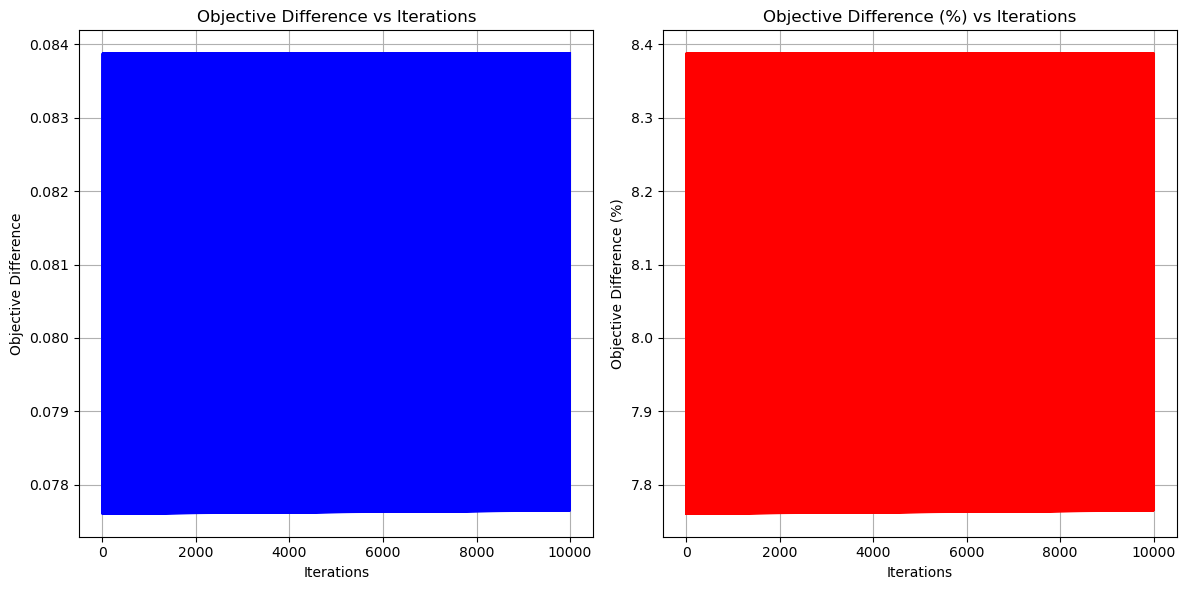

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Number of assets
n = 9  # Ensure n matches ridge_reg.coef_ shape

# Extract coefficients from Ridge regression
coefficients = ridge_reg.coef_

# Ensure coefficients is a 1D array
if coefficients.ndim > 1:
    coefficients = coefficients.ravel()  # Flatten if it's a multi-dimensional array

# Validate the shape
if coefficients.shape[0] != n:
    raise ValueError(f"Mismatch in dimensions: coefficients has shape {coefficients.shape}, expected ({n},)")

print("Coefficients shape:", coefficients.shape)

# Extract intercept
intercept = ridge_reg.intercept_
budget = 1 

# Objective function
def objective(w):
    return np.sum(coefficients * np.log(w * budget)) + intercept - budget * np.sum(w)

# Gradient of the objective function
def gradient(w):
    return (coefficients / w) - budget   # ∂f/∂w

# Gradient Ascent Parameters
alpha = 0.001  # Learning rate
max_iters = 10000  # Maximum iterations
tolerance = 1e-12  # Stop when gradient is small

# Initialize weights (equal distribution)
w = np.ones(n) / n
temp = coefficients.copy()

# Lists to store objective differences and percentage differences for each iteration
objective_differences = []
percentage_differences = []

# Gradient Ascent Loop
for i in range(max_iters):
    grad = gradient(w)
    w_new = w + alpha * grad  # Gradient ascent update
    w_new = np.maximum(w_new, 1e-10)  # Ensure non-negativity (epsilon = 1e-10)
    w_new /= np.sum(w_new)  # Normalize to ensure sum(w) = 1
    
    arr = np.array(w * 8463280931.99112)
    adjusted_budget = 8465103701.313128  # Adjusted budget value if needed
    
    # Calculate the log sum
    sum_log = np.sum(temp * np.log(arr))
    
    # Calculate objective difference and percentage difference
    objective_diff = (sum_log + intercept - adjusted_budget) / adjusted_budget
    percentage_diff = objective_diff * 100
    
    # Store the differences
    objective_differences.append(objective_diff)
    percentage_differences.append(percentage_diff)
    
    # Check for convergence
    if np.linalg.norm(w_new - w) < tolerance:
        print(f"Converged in {i + 1} iterations")
        break
    
    w = w_new

# Plot the Objective Difference and Objective Difference (%) vs Iterations
iterations = np.arange(1, len(objective_differences) + 1)

plt.figure(figsize=(12, 6))

# Plot Objective Difference
plt.subplot(1, 2, 1)
plt.plot(iterations, objective_differences, label='Objective Difference', color='blue')
plt.xlabel('Iterations')
plt.ylabel('Objective Difference')
plt.title('Objective Difference vs Iterations')
plt.grid(True)

# Plot Objective Difference (%)
plt.subplot(1, 2, 2)
plt.plot(iterations, percentage_differences, label='Objective Difference (%)', color='red')
plt.xlabel('Iterations')
plt.ylabel('Objective Difference (%)')
plt.title('Objective Difference (%) vs Iterations')
plt.grid(True)

plt.tight_layout()
plt.show()
